# Core Integra Talent Acquisition Performance

## Project Description

Core Integra offers the service of candidate selection and screening for clients through their talent acquisition team. In this project, these hiring processes funnels will be analyzed with the goal of optimizing processes such as candidate selection, average time between assignment and joining date and more. This analysis will also provide detailed Key Performance Indicators for each employee part of the Talent Acquisition team at Core Integra, which can then be used in order to track individual performance and assign goals for each employee. Lastly, this project will also explore why and how to implement better data collection processes in order to improve the accuracy of the analysis for the future. 

### 1. Loading & Exploring the Dataset

In [2]:
import pandas as pd
import numpy

df=pd.read_csv("HR_Data_CI.csv")
df.head()

,Sr.NO,Assignment Date,Client,Position,Candidate Name,Contact No.,Status,EmailID,Current Location,State,...,Interview Date,Tel / F2F Interview Date - Feedback date,Client Feedback,Tel / F2F Rejection Reason - Client Remarks,Documentation status,Offer Status,Joining Status,DOJ,Joining Month,Spoc Name
0,1.0,3/22/22,SBIPSPL,SBIPSPL - Sales Officer,Sachin Rai,7772016925,Joined,NaN,Bina,West Bengal,...,NaN,NaN,Selected,NaN,Done,Done,Joined,4/1/22,Apr'22,Gouri More
1,2.0,3/22/22,USPL,USPL - Fashion Consultant,Ravi Kumar,9972496106,Joined,NaN,Bengaluru / Bangalore,Karnataka,...,NaN,NaN,Selected,NaN,Done,Done,Joined,4/1/22,Apr'22,Raghavendra M
2,3.0,3/22/22,USPL,USPL - Fashion Consultant,Palle Rajesh,7731859849,Joined,NaN,Warangal,Telangana,...,NaN,NaN,Selected,NaN,Done,Done,Joined,4/1/22,Apr'22,Chandrasekar Jakku
3,4.0,3/22/22,USPL,USPL - Fashion Consultant,Konakala Siva Krishna,8686642252,Joined,NaN,VIJAYAWADA,Andhra Pradesh,...,NaN,NaN,Selected,NaN,Done,Done,Joined,4/1/22,Apr'22,Chandrasekar Jakku
4,5.0,3/22/22,USPL,USPL - Fashion Consultant,Godavari,7349049566,Joined,NaN,Bengaluru / Bangalore,Karnataka,...,NaN,NaN,Selected,NaN,Done,Done,Joined,4/1/22,Apr'22,Raghavendra M


In [3]:
# Display column names
print("Column names:")
print(df.columns)

# Display data types of each column
print("\nData types:")
print(df.dtypes)

Column names:
Index(['Sr.NO', 'Assignment Date', 'Client', 'Position', 'Candidate Name',
       'Contact No.', 'Status', 'EmailID', 'Current Location', 'State ',
       'Qualification', 'HR', 'CI HR Status', 'Interested',
       'Additional Remark - Executive', 'Reference given by',
       'Profile shared on ', 'Interview Date ',
       'Tel / F2F Interview Date - Feedback date', 'Client Feedback',
       'Tel / F2F Rejection Reason - Client Remarks', 'Documentation status',
       'Offer Status', 'Joining Status', 'DOJ', 'Joining Month', 'Spoc Name'],
      dtype='object')

Data types:
Sr.NO                                          float64
Assignment Date                                 object
Client                                          object
Position                                        object
Candidate Name                                  object
Contact No.                                     object
Status                                          object
EmailID              

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34088 entries, 0 to 34087
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Sr.NO                                        33888 non-null  float64
 1   Assignment Date                              33888 non-null  object 
 2   Client                                       33888 non-null  object 
 3   Position                                     33888 non-null  object 
 4   Candidate Name                               33887 non-null  object 
 5   Contact No.                                  33888 non-null  object 
 6   Status                                       4420 non-null   object 
 7   EmailID                                      21217 non-null  object 
 8   Current Location                             33888 non-null  object 
 9   State                                        33884 non-null  object 
 10

As seen above, there are 34088 total entries, although looking at the Non-Null Count of the Candidate Name column, it shows that there are about 200 entries where the name is null.

### 2. Data Cleaning

In [4]:
df = df.drop_duplicates(subset=['Candidate Name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30433 entries, 0 to 33887
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Sr.NO                                        30433 non-null  float64
 1   Assignment Date                              30433 non-null  object 
 2   Client                                       30433 non-null  object 
 3   Position                                     30433 non-null  object 
 4   Candidate Name                               30432 non-null  object 
 5   Contact No.                                  30433 non-null  object 
 6   Status                                       3925 non-null   object 
 7   EmailID                                      19291 non-null  object 
 8   Current Location                             30433 non-null  object 
 9   State                                        30430 non-null  object 
 10  Qua

In the first step, I have removed almost 3000 entries from the table, in which the Candidate Name column was either left empty, or there was a duplicate name. The total number of entries is now 30433.

In [5]:
df['Assignment Date'] = pd.to_datetime(df['Assignment Date'], errors='coerce')
df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
df['Interview Date '] = pd.to_datetime(df['Interview Date '], errors='coerce')
df.head()

/tmp/ipykernel_200/3995995443.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Assignment Date'] = pd.to_datetime(df['Assignment Date'], errors='coerce')
/tmp/ipykernel_200/3995995443.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
/tmp/ipykernel_200/3995995443.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Interview Date '] = pd.to_datetime(df['Interview Date '], errors='coerce')


,Sr.NO,Assignment Date,Client,Position,Candidate Name,Contact No.,Status,EmailID,Current Location,State,...,Interview Date,Tel / F2F Interview Date - Feedback date,Client Feedback,Tel / F2F Rejection Reason - Client Remarks,Documentation status,Offer Status,Joining Status,DOJ,Joining Month,Spoc Name
0,1.0,2022-03-22,SBIPSPL,SBIPSPL - Sales Officer,Sachin Rai,7772016925,Joined,NaN,Bina,West Bengal,...,NaT,NaN,Selected,NaN,Done,Done,Joined,2022-04-01,Apr'22,Gouri More
1,2.0,2022-03-22,USPL,USPL - Fashion Consultant,Ravi Kumar,9972496106,Joined,NaN,Bengaluru / Bangalore,Karnataka,...,NaT,NaN,Selected,NaN,Done,Done,Joined,2022-04-01,Apr'22,Raghavendra M
2,3.0,2022-03-22,USPL,USPL - Fashion Consultant,Palle Rajesh,7731859849,Joined,NaN,Warangal,Telangana,...,NaT,NaN,Selected,NaN,Done,Done,Joined,2022-04-01,Apr'22,Chandrasekar Jakku
3,4.0,2022-03-22,USPL,USPL - Fashion Consultant,Konakala Siva Krishna,8686642252,Joined,NaN,VIJAYAWADA,Andhra Pradesh,...,NaT,NaN,Selected,NaN,Done,Done,Joined,2022-04-01,Apr'22,Chandrasekar Jakku
4,5.0,2022-03-22,USPL,USPL - Fashion Consultant,Godavari,7349049566,Joined,NaN,Bengaluru / Bangalore,Karnataka,...,NaT,NaN,Selected,NaN,Done,Done,Joined,2022-04-01,Apr'22,Raghavendra M


### 3. Creating the new columns

In [6]:
df2=pd.get_dummies(df['Status'])
df3=pd.get_dummies(df['CI HR Status'])
df4=pd.get_dummies(df['Client Feedback'])
df5=pd.get_dummies(df['Documentation status'])
df6=pd.get_dummies(df['Offer Status'])

df['Joined']=df2['Joined'].astype(int)
df['CI HR Interested']=df3['Interested'].astype(int)
df['Client Selected']=df4['Selected'].astype(int)
df['Documentation Done']=df5['Done'].astype(int)
df['Offer Done']=df6['Done '].astype(int)
df['Assignment to Joining Date'] = (df['DOJ'] - df['Assignment Date']).dt.days
df['Assignment to Interview Date'] = (df['Interview Date '] - df['Assignment Date']).dt.days
df['Interview Date to Joining Date'] = (df['DOJ'] - df['Interview Date ']).dt.days

df.head()

,Sr.NO,Assignment Date,Client,Position,Candidate Name,Contact No.,Status,EmailID,Current Location,State,...,Joining Month,Spoc Name,Joined,CI HR Interested,Client Selected,Documentation Done,Offer Done,Assignment to Joining Date,Assignment to Interview Date,Interview Date to Joining Date
0,1.0,2022-03-22,SBIPSPL,SBIPSPL - Sales Officer,Sachin Rai,7772016925,Joined,NaN,Bina,West Bengal,...,Apr'22,Gouri More,1,1,1,1,1,10.0,NaN,NaN
1,2.0,2022-03-22,USPL,USPL - Fashion Consultant,Ravi Kumar,9972496106,Joined,NaN,Bengaluru / Bangalore,Karnataka,...,Apr'22,Raghavendra M,1,1,1,1,1,10.0,NaN,NaN
2,3.0,2022-03-22,USPL,USPL - Fashion Consultant,Palle Rajesh,7731859849,Joined,NaN,Warangal,Telangana,...,Apr'22,Chandrasekar Jakku,1,1,1,1,1,10.0,NaN,NaN
3,4.0,2022-03-22,USPL,USPL - Fashion Consultant,Konakala Siva Krishna,8686642252,Joined,NaN,VIJAYAWADA,Andhra Pradesh,...,Apr'22,Chandrasekar Jakku,1,1,1,1,1,10.0,NaN,NaN
4,5.0,2022-03-22,USPL,USPL - Fashion Consultant,Godavari,7349049566,Joined,NaN,Bengaluru / Bangalore,Karnataka,...,Apr'22,Raghavendra M,1,1,1,1,1,10.0,NaN,NaN


### 4. Calculating Key Performance Indicators

In [7]:
# Key Performance Indicators
total_candidates = len(df)
candidates_joined = df['Joined'].sum()
average_time_to_join = df['Assignment to Joining Date'].mean()
offer_acceptance_rate = (df['Joined'].sum() / df['Offer Done'].sum()) * 100

print(f"Total Candidates: {total_candidates}")
print(f"Candidates Joined: {candidates_joined}")
print(f"Average Time to Join: {average_time_to_join:.2f} days")
print(f"Offer Acceptance Rate: {offer_acceptance_rate:.2f}%")

Total Candidates: 30433
Candidates Joined: 374
Average Time to Join: 27.98 days
Offer Acceptance Rate: 42.74%


### 5. Improving Data Quality

In this section, I will look at improving the data quality of certain columns, such as 'Qualification', which has multiple unique entries, making it more difficult to categorize and analyse. The goal of this section is to analyze the effect that certain qualifications can have on getting an offer, or a job.

The first step is to classify the values in 'Qualification' based on simple factors - such as if the entry starts with 'Bachelor' or 'b.' then it should be classified as Bachelors.

In [8]:
import pandas as pd

df['Qualification']=df['Qualification'].astype(str)

# Define the custom classification function
def classify_qualification(qualification):
    qualification = qualification.strip().lower()  # Normalize the text
    if qualification.startswith('b.') or qualification.startswith('b') or qualification.startswith('bachelor') or qualification.startswith('under'):
        return 'Bachelors'
    elif qualification.startswith('12') or qualification.startswith('high'):
        return 'High School'
    elif qualification.startswith('m') or qualification.startswith('master'):
        return 'Masters'
    else:
        return 'Other'

# Apply the classification function to the 'Qualification' column
df['Qualification Category'] = df['Qualification'].apply(classify_qualification)

count = df['Qualification Category'].value_counts().head(100)

print(f" {count}")

 Qualification Category
Other          22783
Bachelors       6148
Masters         1389
High School      113
Name: count, dtype: int64


**Insight:** As seen above, there are almost 23000 entries in the Other category, which means there is a lot of unstandardized data that could not be classified into the categories listed above. Therefore, it would be a suitable recommendation to implement better data collection processes - such as classifying the qualification entries into 10 different categories in order to analyze. 

This next part will explore the data accuracy of the column 'Status'. 

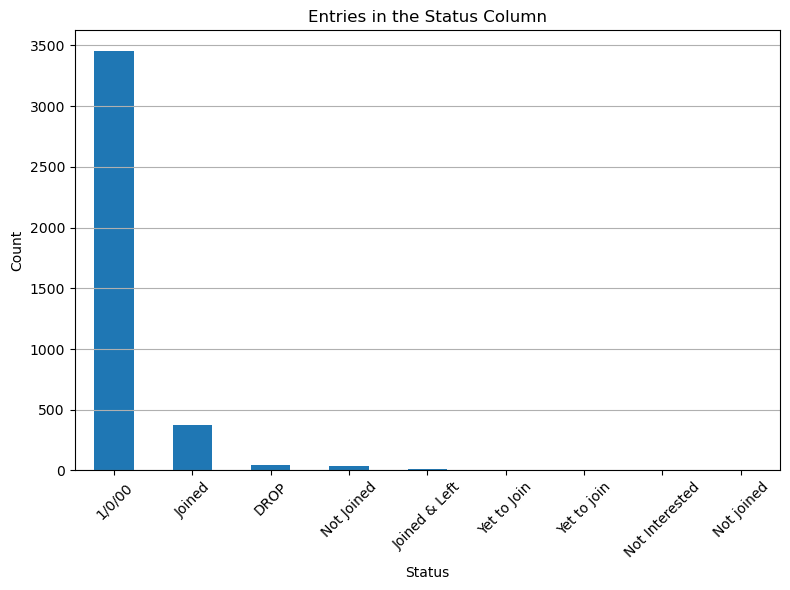

In [9]:
import matplotlib.pyplot as plt

status_counts = df['Status'].value_counts()

plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar')
plt.title('Entries in the Status Column')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:** As seen above, a majority of the entries are categorized as '1/0/00', which has no relevance in this column. This is another area where better data collection processes could be implemented, as those entries classified as '1/0/00' should actually be classified in the other categories. 

### 6. Core Integra Talent Acquisition Team Performance

In this section, I will be exploring different methods and techniques to analyze the data, such as data visualization tools, regression analysis, and more, to extract key insights. 

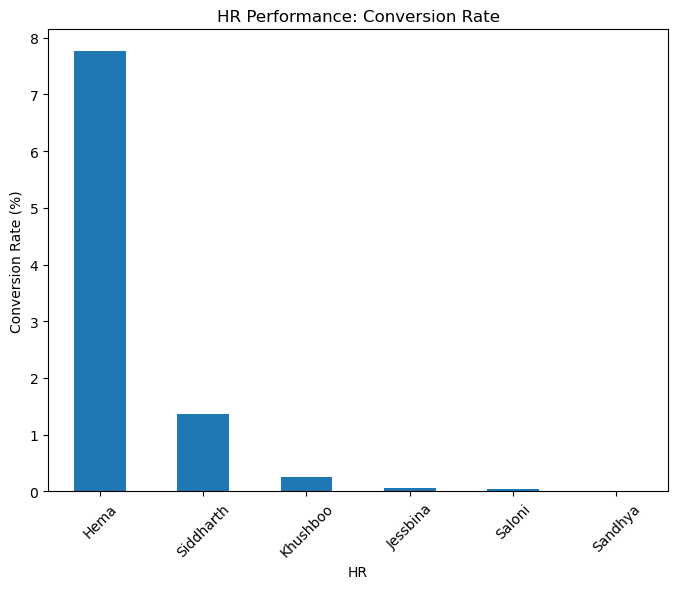

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

total_candidates = df.groupby('HR')['Candidate Name'].count()

joined_candidates = df.groupby('HR')['Joined'].sum()

conversion_rate = (joined_candidates / total_candidates) * 100

plt.figure(figsize=(8, 6))
conversion_rate.sort_values(ascending=False).plot(kind='bar')
plt.title('HR Performance: Conversion Rate')
plt.xlabel('HR')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [11]:
hr_grouped = df.groupby('HR').agg(
    total_candidates=('HR', 'count'),
    total_joined=('Joined', 'sum'),
)

hr_grouped['conversion_rate'] = (hr_grouped['total_joined'] / hr_grouped['total_candidates']) * 100

hr_grouped = hr_grouped.sort_values(by='conversion_rate', ascending=False)

hr_grouped

,total_candidates,total_joined,conversion_rate
HR,,,
Hema,3854,299,7.758173
Siddharth,3651,50,1.369488
Khushboo,7668,20,0.260824
Jessbina,1844,1,0.054230
Saloni,9333,4,0.042859
Sandhya,4083,0,0.000000


**Insight:** As seen in the above table and graph, it is clear that Hema has had the most number of candidates that have joined the client, and the highest conversion rate in doing so by a comfortable margin. There might be several factors to this, such as incorrect candidate assignments, incorrect entries in the 'Status' column that do not reflect the correct status of the candidate (which could be related to the large number of 1/0/00 entries in the 'Status' column). 

However, we could analyze this a bit further, and try to see why these employees have such low conversion rates. 

In [14]:
hr_grouped_detailed = df.groupby('HR').agg(
    total_candidates=('HR', 'count'),
    total_screened=('CI HR Interested', 'sum'),
    total_selected_by_client=('Client Selected', 'sum'),
    total_joined=('Joined', 'sum'),
)

hr_grouped_detailed['screened %'] = (hr_grouped_detailed['total_screened'] / hr_grouped_detailed['total_candidates']) * 100
hr_grouped_detailed['selected %'] = (hr_grouped_detailed['total_selected_by_client'] / hr_grouped_detailed['total_screened']) * 100
hr_grouped_detailed['joined %'] = (hr_grouped_detailed['total_joined'] / hr_grouped_detailed['total_selected_by_client']) * 100

# Round specific columns to two decimal places
hr_grouped_detailed['screened %'] = hr_grouped_detailed['screened %'].round(2)
hr_grouped_detailed['selected %'] = hr_grouped_detailed['selected %'].round(2)
hr_grouped_detailed['joined %'] = hr_grouped_detailed['joined %'].round(2)

# Reorder columns
hr_grouped_detailed = hr_grouped_detailed[
    ['total_candidates', 'screened %', 'total_screened', 'selected %', 'total_selected_by_client', 'joined %', 'total_joined']
]

hr_grouped_detailed

,total_candidates,screened %,total_screened,selected %,total_selected_by_client,joined %,total_joined
HR,,,,,,,
Hema,3854,38.71,1492,30.36,453,66.00,299
Jessbina,1844,23.70,437,4.35,19,5.26,1
Khushboo,7668,25.17,1930,11.97,231,8.66,20
Saloni,9333,17.84,1665,10.21,170,2.35,4
Sandhya,4083,29.17,1191,15.79,188,0.00,0
Siddharth,3651,45.74,1670,10.12,169,29.59,50


In the table above, we have calculated the numbers for the entire hiring funnel, along with their conversion rates. Screened % refers to the percentage of applicants chosen by Core Integra employees. Selected % refers to the percentage of applicants that were selected by the client from the ones who were chosen by Core Integra employees. Joined % refers to the percentage of applicants that joined the client after being selected by the client. 

**Insight:** It is clear to see that Conversion Rate 1 is quite high for all employees, which means that there is a large number of candidates being selected by Core Integra employees. However, the major differences in Employee Performance is visible while analysing Conversion Rate 2 and 3, as it is clear to see that Hema has much higher conversion rates in these areas than the others. Therefore, the selection procedure that Hema uses might be valuable to investigate so that those strategies can be implemented with other employees too.

Next, I want to analyze the reason why Core Integra HR Employees rejected a candidate, in order to better understand their screening processes.

In [15]:
exclude_statuses = ['Interested', 'Not Interested', 'Rejected', 'interested']
df_filtered = df[~df['CI HR Status'].isin(exclude_statuses)]

grouped = df_filtered.groupby(['HR', 'CI HR Status']).size().reset_index(name='count')

top5_per_hr = grouped.groupby('HR').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

pivot_table = top5_per_hr.pivot(index='HR', columns='CI HR Status', values='count').fillna(0)

pivot_table

CI HR Status,Call Back,Interested But Vehicle Not Available,Location Issue,NA Female Candidate,NA Undergraduate,Not Connected,Reconnected,Salary Issue
HR,,,,,,,,
Hema,130.0,0.0,84.0,0.0,32.0,929.0,0.0,22.0
Jessbina,162.0,0.0,117.0,0.0,0.0,166.0,16.0,164.0
Khushboo,0.0,165.0,0.0,0.0,138.0,1171.0,1924.0,242.0
Saloni,475.0,0.0,137.0,0.0,0.0,1820.0,739.0,525.0
Sandhya,434.0,0.0,60.0,0.0,0.0,938.0,30.0,116.0
Siddharth,0.0,0.0,0.0,56.0,56.0,498.0,45.0,60.0


**Insight:** There are definitely some interesting data points that could be investigated further here, such as Khushboo having 167 candidates who she was interested in, but they didn't have a vehicle whereas other employees have not experienced this reason. Other interesting points here include the 'Reconnected' entry, which should instead just be classified as 'Interested', 'Rejected' or the relevant reasoning for rejection. Lastly, I would like to find out more about what happens to candidates that have been rejected due to reasons such as location, salary or qualifications - are these candidates referred to other job opportunities or are they not contacted again? There are probably a lot of other jobs for Core Integra's clients wherein the candidate might be a better fit. 

Next, I will be analyzing the days taken between hiring processes for each employee

In [16]:
df_selected = df[['HR', 'Assignment to Interview Date', 'Interview Date to Joining Date', 'Assignment to Joining Date']].copy()

averages = df_selected.groupby('HR').mean()

averages = averages.applymap(lambda x: f"{x:.1f}" if isinstance(x, float) else x)

averages

/tmp/ipykernel_200/4031755480.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  averages = averages.applymap(lambda x: f"{x:.1f}" if isinstance(x, float) else x)


,Assignment to Interview Date,Interview Date to Joining Date,Assignment to Joining Date
HR,,,
Hema,6.5,15.2,14.7
Jessbina,4.7,50.5,43.6
Khushboo,15.3,23.0,39.6
Saloni,23.8,26.8,37.7
Sandhya,11.6,nan,55.2
Siddharth,16.6,21.3,27.8


**Insight**: This analysis clearly shows that Hema is converting candidates from Assignment to Joining faster than any other Core Integra HR Employee. An important point to note is that Hema is also processing the candidate's application faster and scheduling interviews within 1 week after assignment. After assignment of the candidate, the employees should all strive to process the candidate's application faster so that the process time is faster and more efficient.

### 7. Client Fulfillment Analysis

In this section, I will look at some basic analysis, including analyzing the relationship between qualification and client selection, and analyze similar KPIs as written in the above section, but from the client's perspective.

First, we will look at the qualifications of candidates that are being selected by the client, and then the qualifications of candidates that are joining the client. 

In [17]:
selected_candidates = df[df['Client Selected'] == 1]

qualification_analysis = selected_candidates.groupby(['Client', 'Qualification Category']).size().unstack(fill_value=0)

qualification_analysis

Qualification Category,Bachelors,High School,Masters,Other
Client,,,,
CO Foods,0,0,0,1
Core Integra Inhouse,3,0,7,34
DBS Bank,0,0,0,1
Enlite Research Pvt Ltd,2,0,0,0
HAPAG,0,0,0,5
Infovision Technologies Pvt. Ltd,0,0,0,3
SBIPSPL,0,1,0,7
TCS,128,2,44,770
USPL,0,0,0,222


In [18]:
joined_candidates = df[df['Joined'] == 1]

qualification_analysis_2 = joined_candidates.groupby(['Client', 'Qualification Category']).size().unstack(fill_value=0)

qualification_analysis_2

Qualification Category,Bachelors,High School,Masters,Other
Client,,,,
Ayana,0,0,0,1
Core Integra Inhouse,0,0,0,14
ESCORT,0,0,0,1
Enlite Research Pvt Ltd,0,0,0,1
HAPAG,0,0,0,1
Infovision Technologies Pvt. Ltd,0,0,0,1
SBIPSPL,0,1,0,6
TCS,11,0,1,184
USPL,0,0,0,150


**Insight:** It is clear to see that the data is not very reliable to perform a thorough and conclusive analysis, due to the high number of entries in the 'Other' section. This again would reiterate the point that some data such as Qualification could be collected in a more standardized format for better analysis. 

In [19]:
client_grouped = df.groupby('Client').agg(
    total_candidates=('Candidate Name', 'count'),
    total_joined=('Joined', 'sum'),
)

client_grouped['conversion_rate'] = (client_grouped['total_joined'] / client_grouped['total_candidates']) * 100

client_grouped = client_grouped.sort_values(by='total_candidates', ascending=False)


client_grouped.head(15)

,total_candidates,total_joined,conversion_rate
Client,,,
TCS,24723,196,0.792784
SBIPSPL,2133,7,0.328176
Core Integra Inhouse,2009,14,0.696864
USPL,511,150,29.354207
HAPAG,458,1,0.218341
Enlite Research Pvt Ltd,120,1,0.833333
Infovision Technologies Pvt. Ltd,90,1,1.111111
CO Foods,70,0,0.000000
Y K Desai & Co,51,0,0.000000


**Insight:** As seen above, TCS is the client with the most number of candidate applications. However, when looking at the total number that have joined, USPL is not too far away despite a much lower number of applications. 

However, this could be explored further in order to better understand the complete hiring process, and what the conversion numbers are for each step of the funnel. 

In [20]:
client_grouped_detailed = df.groupby('Client').agg(
    total_candidates=('Candidate Name', 'count'),
    total_screened=('CI HR Interested', 'sum'),
    total_selected_by_client=('Client Selected', 'sum'),
    total_joined=('Joined', 'sum'),
)

client_grouped_detailed['screened %'] = (client_grouped_detailed['total_screened'] / client_grouped_detailed['total_candidates']) * 100
client_grouped_detailed['selected %'] = (client_grouped_detailed['total_selected_by_client'] / client_grouped_detailed['total_screened']) * 100
client_grouped_detailed['joined %'] = (client_grouped_detailed['total_joined'] / client_grouped_detailed['total_selected_by_client']) * 100

client_grouped_detailed = client_grouped_detailed.sort_values(by='total_candidates', ascending=False)

client_grouped_detailed['screened %'] = client_grouped_detailed['screened %'].round(2)
client_grouped_detailed['selected %'] = client_grouped_detailed['selected %'].round(2)
client_grouped_detailed['joined %'] = client_grouped_detailed['joined %'].round(2)

client_grouped_detailed = client_grouped_detailed[
    ['total_candidates', 'screened %', 'total_screened', 'selected %', 'total_selected_by_client', 'joined %', 'total_joined']
]

client_grouped_detailed.head(15)

,total_candidates,screened %,total_screened,selected %,total_selected_by_client,joined %,total_joined
Client,,,,,,,
TCS,24723,27.69,6847,13.79,944,20.76,196
SBIPSPL,2133,18.61,397,2.02,8,87.50,7
Core Integra Inhouse,2009,32.60,655,6.72,44,31.82,14
USPL,511,53.82,275,80.73,222,67.57,150
HAPAG,458,5.02,23,21.74,5,20.00,1
Enlite Research Pvt Ltd,120,25.00,30,6.67,2,50.00,1
Infovision Technologies Pvt. Ltd,90,28.89,26,11.54,3,33.33,1
CO Foods,70,58.57,41,2.44,1,0.00,0
Y K Desai & Co,51,3.92,2,0.00,0,NaN,0


In the table above, conversion rate 1 refers to the percentage of candidates that were selected by Core Integra staff from the total candidates. Conversion rate 2 refers to the percentage of candidates that were selected by the client from the total number of candidates selected by Core integra staff. Conversion rate 3 refers to the percentage of candidates that joined the Client from the candidates selected by the client. 

**Insight:** These conversion rates indicate the success of the application process for each client. Conversion rate 2 is an important KPI to keep a track of, since this conversion rate is an indicator of how successful the Core Integra team's selection process is with respect to the client and job requirements. It is clear to see that for clients such as TCS, the screening process could be modified a bit further in order to make the process more efficient. 

For the next section, I will focus on only TCS as a client, as the rejection feedback is not available for clients besides TCS and Core Integra Inhouse. As seen in the table above, only 944 candidates have been selected by TCS out of a total 6847 candidates that were selected by Core Integra. For the next piece of analysis, I will be looking at the reasons for rejection by TCS.

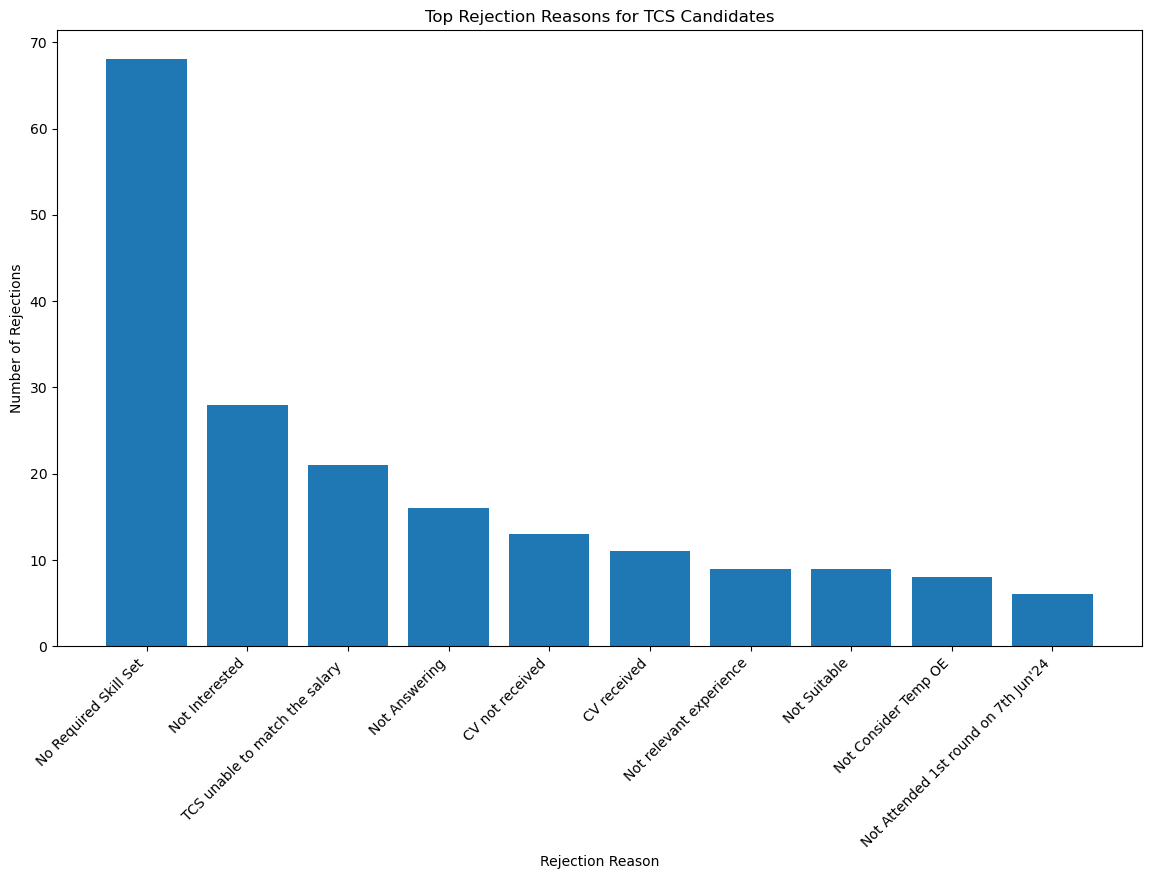

In [76]:
tcs_rejections = df[df['Client'] == 'TCS']

# Group by Rejection Reason and count the occurrences
tcs_rejection_reasons = tcs_rejections.groupby('Tel / F2F Rejection Reason - Client Remarks').size().reset_index(name='count')

# Sort the reasons by count in descending order and get the top reasons
top_tcs_rejection_reasons = tcs_rejection_reasons.sort_values(by='count', ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(14, 8))
plt.bar(top_tcs_rejection_reasons['Tel / F2F Rejection Reason - Client Remarks'], top_tcs_rejection_reasons['count'])
plt.title('Top Rejection Reasons for TCS Candidates')
plt.xlabel('Rejection Reason')
plt.ylabel('Number of Rejections')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight:** It is clear to see that there are a large number of candidates who are being rejected for reasons that should have been taken into consideration during the screening process at Core Integra - such as TCS not being able to match the salary demands, or the incorrect skill set. These rejection reasons show where Core Integra can improve in their own selection processes to better match the client's requirements. 

In the next section, I want to explore the offer acceptance rate for each client i.e. how many candidates actually ended up joining after being given an offer. 

In [102]:
offer_analysis = df.groupby('Client').agg(
    offer_done=('Offer Done', 'sum'),
    joined=('Joined', 'sum')
)

# Calculate the Offer Acceptance Rate
offer_analysis['offer_acceptance_rate'] = (offer_analysis['joined'] / offer_analysis['offer_done']) * 100

# Display the resulting DataFrame
offer_analysis = offer_analysis.reset_index()
offer_analysis.sort_values(by='offer_acceptance_rate', ascending = False).head(13)

,Client,offer_done,joined,offer_acceptance_rate
0,Ayana,0,1,inf
4,ESCORT,0,1,inf
20,Vayana Networks,0,1,inf
21,Vedarth Animation Studio,0,1,inf
15,SBIPSPL,4,7,175.000000
19,USPL,222,150,67.567568
5,Enlite Research Pvt Ltd,2,1,50.000000
2,Core Integra Inhouse,28,14,50.000000
9,Infovision Technologies Pvt. Ltd,2,1,50.000000
17,TCS,610,196,32.131148


**Insight:** It is evident that there are again some data entry issues in the 'Offer Done' column (SBIPSPL has more people that have joined than they have given an offer to). However, it is also interesting that there are still a significant number of candidates who are rejecting the offer for all clients. It would be useful to gather more data and what happens to these clients and their reasons for rejection. TCS, being the client with the most applications, also has a very low offer acceptance rate, which means the candidates are rejecting the client for various reasons which need to be explored further.

### 8. Conclusion

While there are a lot of improvements that could be made from a data collection, accuracy, and normalization perspective, there are still a lot of interesting analyses that can be derived from the existing dataset. In this project, I have structured the dataset in a more organized way in order to conduct more accurate analysis by creating new columns and changing existing ones. I have analyzed the Core Integra Talent Acquisition Team Performance as well as the Client Fulfillment, and this analysis will be used to make a dashboard in order to better track KPIs for the team and set goals for better conversion rates and performance. 

## Thank you so much for your time. 

In [1]:
df.info()

NameError: name 'df' is not defined